4.2\. Find the outer product of the following two vecotrs (10 MINUTES)

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [1]:
import numpy as np
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
w = np.outer(u,v)
l = np.array( [ [i*j for i in v] for j in u ] )
b = u.reshape(-1, 1) * v.reshape(1, -1)
print(w,'\n',l,'\n',b)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


4.4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive). (10 MINUTES)

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.76159822 0.82506474 3.87145761 3.93492413]


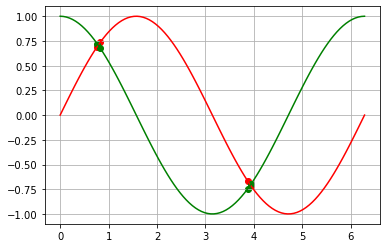

In [2]:
lin = np.linspace(0,2*np.pi,100)
#print( lin[::10], lin[::-1])

b = np.array( abs(np.sin(lin)-np.cos(lin)) )
c = lin[b<0.1]
print( c )

import matplotlib.pyplot as plt

plt.plot(lin,np.sin(lin), color='red')
plt.plot(lin,np.cos(lin), color='green')
plt.scatter(c, np.sin(c), color='red')
plt.scatter(c, np.cos(c), color='green')
plt.grid()
plt.show()

4.6\. Use broadcasting to create a grid of distances (15 MINUTES)

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [3]:
pos = np.array( [0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448] )

grid = abs( pos.reshape(1,-1) - pos.reshape(-1,1) )
print(grid)
print(grid*1.609)

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
[[   0.     318.582  487.527 1184.224 1401.439 1890.575 2373.275 2484.296
  3078.017 3938.832]
 [ 318.582    0.     168.945  865.642 1082.857 1571.993 2054.693 2165.714
  2759.435 3620.25 ]
 [ 487.527  168.945    0.     696.697  913.912 1403.048 1885.748 1996.769
  2590.49  3451.305]
 [1184.224  865.642  696.697    0.     217.215  706.351 1189.051 1300.072
  1893.793 2754.608]
 [1401.439 1082.857  913.912  217.215    0.     489.136  971.836 1082.857
  1676.578 2537

4.7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask). (20 MINUTES)
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
  

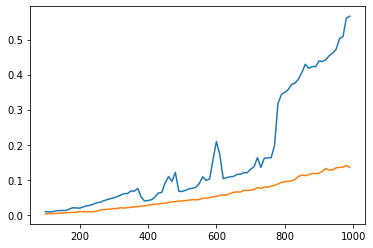

In [4]:
def primes(N):
    mask = np.array( [True]*int(N+1) )
    lin = np.linspace(0,N,N+1)
    for j in range(2,N):
        err = [i*j for i in range(2,N) if i*j<=N] 
        mask[err]=False
    return lin[mask]

def eratho(M):
    num=np.array( [i for i in range(2,M)] )

    for k in num:
        a=[i%k!=0 if i>k else True for i in num ]
        num=num[a]
    
    return num

import timeit
t=np.arange(100,1000,10)
    
primes_time = []
for i in t:
    starttime = timeit.default_timer()
    primes(i)
    primes_time.append( timeit.default_timer() - starttime ) 

eratho_time = []
for i in t:
    starttime = timeit.default_timer()
    eratho(i)
    eratho_time.append( timeit.default_timer() - starttime ) 
    
plt.plot(t, primes_time)
plt.plot(t, eratho_time)



4.8\. Diffusion using random walk (30 MINUTES)

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

[[ 1  1  1 ...  1 -1  1]
 [-1  1  1 ...  1  1 -1]
 [ 1  1  1 ... -1  1  1]
 ...
 [-1  1  1 ... -1 -1  1]
 [-1  1 -1 ... -1 -1 -1]
 [-1  1  1 ...  1  1  1]]


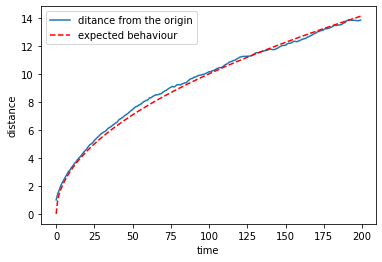

In [5]:
import numpy.random as npr
npr.seed(123546464)
walkers = 1000
steps   =  200
grid = npr.randint(2, size=(walkers, steps))
grid[grid == 0] = -1

print(grid)

position = np.cumsum(grid, axis=1)
pos2     = np.square(position)
mean2    = np.mean(pos2, axis=0)
sqmean2  = np.sqrt(mean2)

plt.plot(np.arange(steps), sqmean2, label = 'ditance from the origin')
plt.plot(np.arange(steps), np.sqrt(np.arange(0, steps)), linestyle = 'dashed', color = 'red', label = 'expected behaviour')
plt.xlabel('time')
plt.ylabel('distance')
plt.legend()
plt.show()

4.9\. Analyze a data file (15 MINUTES)
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [6]:
#!wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


[]

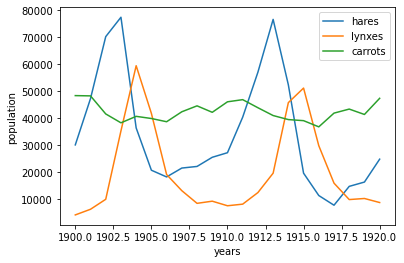

In [7]:
import pandas as pd
df = pd.read_csv('populations.txt', delimiter = '\t')

data = np.loadtxt('populations.txt')
print(data)
years = np.array(data.T[0])
hares = np.array(data.T[1])
lynxes = np.array(data.T[2])
carrots = np.array(data.T[3])

plt.plot(years,hares, label='hares')
plt.plot(years,lynxes, label='lynxes')
plt.plot(years,carrots, label='carrots')
plt.legend()
plt.xlabel('years')
plt.ylabel('population')
plt.plot()

In [8]:
X = data[:,1:]
print(X)
Mean = np.mean(X, axis=0)
print("\nMean vector:")
print(Mean)
Std = np.std(X, axis = 0)
print("\nStd vector:")
print(Std)
print("\n Correlation matrix")
print(np.corrcoef(X.T))


[[30000.  4000. 48300.]
 [47200.  6100. 48200.]
 [70200.  9800. 41500.]
 [77400. 35200. 38200.]
 [36300. 59400. 40600.]
 [20600. 41700. 39800.]
 [18100. 19000. 38600.]
 [21400. 13000. 42300.]
 [22000.  8300. 44500.]
 [25400.  9100. 42100.]
 [27100.  7400. 46000.]
 [40300.  8000. 46800.]
 [57000. 12300. 43800.]
 [76600. 19500. 40900.]
 [52300. 45700. 39400.]
 [19500. 51100. 39000.]
 [11200. 29700. 36700.]
 [ 7600. 15800. 41800.]
 [14600.  9700. 43300.]
 [16200. 10100. 41300.]
 [24700.  8600. 47300.]]

Mean vector:
[34080.95238095 20166.66666667 42400.        ]

Std vector:
[20897.90645809 16254.59153691  3322.50622558]

 Correlation matrix
[[ 1.          0.07189206 -0.01660378]
 [ 0.07189206  1.         -0.68057717]
 [-0.01660378 -0.68057717  1.        ]]


In [9]:
for i in range(len(years)):
    ca = max(hares[i], lynxes[i], carrots[i])
    if ca == hares[i]:
        print("In", int(years[i]), "the species with the highest population was hares.")
    elif ca == lynxes[i]:
        print("In", int(years[i]), "the species with the highest population was lynxes.")
    elif ca == carrots[i]:
        print("In", int(years[i]), "the species with the highest population was carrots.")

In 1900 the species with the highest population was carrots.
In 1901 the species with the highest population was carrots.
In 1902 the species with the highest population was hares.
In 1903 the species with the highest population was hares.
In 1904 the species with the highest population was lynxes.
In 1905 the species with the highest population was lynxes.
In 1906 the species with the highest population was carrots.
In 1907 the species with the highest population was carrots.
In 1908 the species with the highest population was carrots.
In 1909 the species with the highest population was carrots.
In 1910 the species with the highest population was carrots.
In 1911 the species with the highest population was carrots.
In 1912 the species with the highest population was hares.
In 1913 the species with the highest population was hares.
In 1914 the species with the highest population was hares.
In 1915 the species with the highest population was lynxes.
In 1916 the species with the highest 

5.4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number (20 MINUTES).

Each line correspond to a credit card number.

Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [10]:
char_size = 6
file = 'credit_card.dat'
with open(file, 'r') as f:
    for line in f:
        n = ''
        for i in range(0, len(line), char_size):
            if len(line[i:]) >= char_size:
                c = chr(int(line[i:i+char_size],2))
                n += c
        print(n)

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303
5774 8528 2087 1117
8140 1210 6352 2845
5764 1133 7301 7100
6456 1737 4126 6726
1228 8631 7382 0000
7051 0160 5374 3166
0618 3587 1630 6376
1545 5454 7444 5636
6735 3116 3202 6834
7287 5011 1547 8413
7033 2607 3328 4200
2568 5244 1874 5024
1684 2253 7570 7118
0672 2576 0575 6631
6332 8353 8787 1340
1813 3361 1175 4211
2477 6450 8840 2368
5512 3505 2563 1326
3083 7882 0621 0025
4521 5148 8045 0334
7563 3654 8713 5787
8324 2664 0476 5561
0565 2504 7168 3510
5107 5507 1767 0738
2462 1821 2448 1443
2788 0638 6861 6554
5851 5873 5474 0547
0670 1004 4013 2655
5874 5506 3048 0806
2805 5401 8462 1260
5083 8406 6310 1862
1076 1445 3013 2266
8440 4804 4844 5277
4758 6141 0686 1387
7586 0675 0315 2568
2544 1258 7432 5165
3474 5023 4434 5626
1410 0270 0434 5086
7315 4446 1104 4215
0224 7742 8300 0266
0170 2700 3145 0640
2006 2437 8054 1600
8142 4055 1776 0026
3026 7380 1241 1084


## Pandas analysis (60 MINUTES)

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [197]:
import pandas as pd
N=100000
data = pd.read_csv('data_000637.txt', nrows=N)
df = pd.DataFrame(data)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
99995,1,0,64,3869201161,2378,29
99996,1,0,70,3869201161,2472,26
99997,1,0,58,3869201161,2558,0
99998,1,0,57,3869201161,2561,23


In [198]:
x = max(df['BX_COUNTER'])-min(df['BX_COUNTER'])

df['TIME']= df['TDC_MEAS']*25/30 + df['BX_COUNTER']*25 + x * ( df['ORBIT_CNT'] - df['ORBIT_CNT'][0] ) * 25

total_time = ( max(df['TIME']) - min(df['TIME']) ) * 10**(-9)
print(total_time)

df['HEAD']=np.random.randint(0,2,N)

dfh = df[df['HEAD']==1]
dfh

0.08854531333333333


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
3,1,0,64,3869200167,2558,19,6.396583e+04
6,1,0,61,3869200167,2772,14,6.931167e+04
7,1,0,139,3869200167,2776,0,6.940000e+04
11,1,0,64,3869200167,2786,19,6.966583e+04
12,1,1,6,3869200167,2792,18,6.981500e+04
...,...,...,...,...,...,...,...
99993,1,1,106,3869201161,2304,16,8.859816e+07
99994,1,0,63,3869201161,2376,25,8.859997e+07
99996,1,0,70,3869201161,2472,26,8.860237e+07
99997,1,0,58,3869201161,2558,0,8.860450e+07


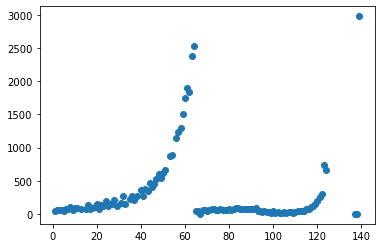

In [199]:
fpga = dfh.groupby(['FPGA'])
df0 = fpga.get_group(0)
df1 = fpga.get_group(1)

tdc0 = df0.groupby(['TDC_CHANNEL'])
chan = tdc0.groups.keys()
siz = tdc0.size()

plt.scatter(chan,np.array(siz))

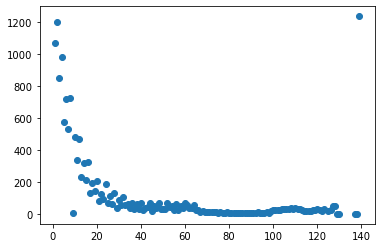

In [200]:
tdc1 = df1.groupby(['TDC_CHANNEL'])
chan1 = tdc1.groups.keys()
siz1 = tdc1.size()

plt.scatter(chan1,np.array(siz1))

In [201]:
dfh.groupby(['TDC_CHANNEL']).size().sort_values().tail(3)

TDC_CHANNEL
63     2429
64     2591
139    4216
dtype: int64

In [202]:
len(dfh['ORBIT_CNT'].unique())

995

In [203]:
len(dfh[dfh['TDC_CHANNEL']==139]['ORBIT_CNT'].unique())

977

7.1\. **Kernel Density Estimate** (40 MINUTES)

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


997.9766790495673


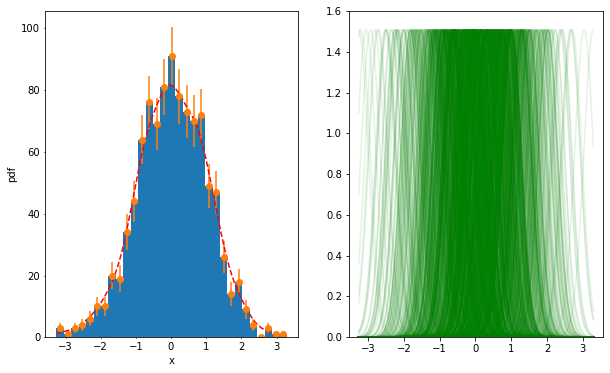

In [11]:
mu = 0
std = 1
N = 1000
x = np.random.normal(mu,std,N)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,6))

bins_counts, bin_edges, _ = ax[0].hist(x, bins=int(np.sqrt(N)))

ax[0].set_xlabel('x')
ax[0].set_ylabel('pdf')
ax[0].tick_params(which='major', length=1, width=1.0)


yerr = np.sqrt(bins_counts)
bar = (bin_edges[:-1] + bin_edges[1:]) /2
ax[0].errorbar(bar,bins_counts,yerr, fmt='o')
ax[0].plot()

import scipy
from scipy.stats import norm
std = 1.06*np.std(x)*N**(-1/5)

gaussians = []
t = np.linspace(min(x), max(x), N)
for i in x:
    
    gauss = norm.pdf(t,i,std)
    ax[1].plot(t,gauss,color='Green', alpha = 0.1)
    gaussians.append(gauss)

ax[1].set_xlim(x.min() - std, x.max()+std)
ax[1].set_ylim(-0.001, 1.60)

gauss_sum = np.sum(gaussians, axis=0)

I = scipy.integrate.trapz(gauss_sum,t)
print(I)

binstep = bin_edges[1]-bin_edges[0]
ax[0].plot(t,gauss_sum*N*binstep/I, color = 'red', linestyle ='dashed')

plt.show()

7.2\. **Color-coded scatter plot** (10 MINUTES)

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

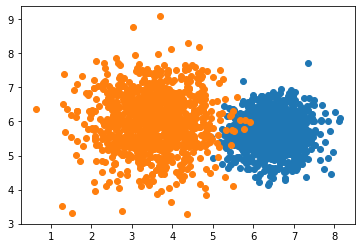

In [12]:
n=2
for i in range(n):
    meanx = np.random.random()*10
    meany = np.random.random()*10
    std = np.random.random()
    x = np.random.normal(meanx,std,N)
    y = np.random.normal(meany,std,N) 
    plt.scatter(x,y)
plt.show()

7.3\. **Profile plot** (30 MINUTES)

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

LinregressResult(slope=0.0032597701220305835, intercept=-0.15432816763069473, rvalue=0.043403510522559086, pvalue=8.717037183576464e-06, stderr=0.0007327014008445789)


<ErrorbarContainer object of 3 artists>

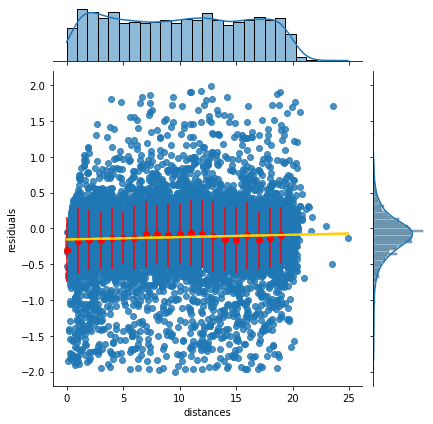

In [13]:
file = 'residuals_261.npy'
data = np.load(file, allow_pickle = True)
df = pd.DataFrame(data.item())

dfr = df[abs(df['residuals'])<2]

linreg = scipy.stats.linregress(dfr['distances'],dfr['residuals'])
print(linreg)
import seaborn as sns

#sns.set(font_scale = 1.5)
sea = sns.jointplot(data=dfr, x="distances", y="residuals", kind="reg", line_kws  = {'color':'orange'})

sea.ax_joint.plot(dfr['distances'],
         linreg.intercept + linreg.slope*dfr['distances'],
         linewidth = 2, label = "linregress", color = 'yellow',
         alpha = 0.5, linestyle = 'dashed' )

step = 1
t = np.arange(0,20,step)
y = np.empty(0)
erry = np.empty(0)

for i in t:
    resx = dfr[(dfr['distances'] <  (i+step/2)) &
                   (dfr['distances'] >= (i-step/2))]['residuals']
    y    = np.append(   y, resx.mean() )
    erry = np.append(erry, resx.std() )
    
sea.ax_joint.scatter(t, y, color = 'red')
sea.ax_joint.errorbar(t,y,yerr = erry, ls = 'none', color = 'red')


8.1\. **PCA on 3D dataset** (45 MINUTES)

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [14]:
from scipy import linalg as la

N=1000
x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2
X=np.array((x1,x2,x3))
C = np.cov(X)

avl, avt = la.eig(C)

U, spectrum, Vt = la.svd(X)
l=spectrum**2/(N-1)
#print(l,'\n',U)

L = l/np.sum(l)
#print(L[0])

Xreduced = np.array((x1,x2))

X_rot = np.dot(avt.T,X)
print(X_rot)



[[-6.53612820e-01  8.86086255e+00  2.28710412e-01 ... -3.77461526e+00
  -1.53918116e+00 -2.18338816e-01]
 [-2.92006650e-16  9.19674471e-16  1.09161432e-15 ...  1.51773993e-16
  -1.44612829e-17  4.16096796e-16]
 [-4.47885466e-01  1.58065591e-02  1.82925291e+00 ...  6.55952917e-01
  -1.91888437e-02  7.47719360e-01]]


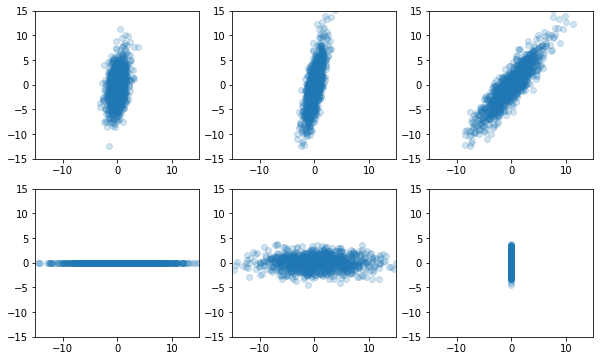

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,6))
ax[0][0].scatter(x1,x2,alpha=0.2)
ax[0][1].scatter(x1,x3,alpha=0.2)
ax[0][2].scatter(x2,x3,alpha=0.2)

x1r = X_rot[0]
x2r = X_rot[1]
x3r = X_rot[2]

ax[1][0].scatter(x1r,x2r,alpha=0.2)
ax[1][1].scatter(x1r,x3r,alpha=0.2)
ax[1][2].scatter(x2r,x3r,alpha=0.2)

for i in range(0,2):
    for j in range(0,3):
        ax[i,j].set_ylim(-15, 15)
        ax[i,j].set_xlim(-15, 15)
plt.show()

8.3 \. **Looking at an oscillating spring** (60 MINUTES)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [16]:
N = 1000
alfa = 0
w = 0.5
A = 3
t = np.arange(N)

def motion(t, A, w, alfa):
    return A * np.cos(w*t + alfa)

x = motion(t, A, w, alfa)
y = np.random.normal(scale = 0.5, size = N)
z = np.zeros(N)

X = np.concatenate(([x], [y], [z]), axis = 0)

l, V = la.eig(np.cov(X))
print('eigenvalues :\n', l)
print('eigenvectors:\n', V)




eigenvalues :
 [4.50898113+0.j 0.25559587+0.j 0.        +0.j]
eigenvectors:
 [[ 0.99999036  0.00439094  0.        ]
 [-0.00439094  0.99999036  0.        ]
 [ 0.          0.          1.        ]]


9.1\. **Maximum wind speed prediction at the Sprogø station** (30 MINUTES)

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



21
[0.04545455 0.09090909 0.13636364 0.18181819 0.22727273 0.27272728
 0.3181818  0.36363637 0.4090909  0.45454547 0.5        0.54545456
 0.59090906 0.6363636  0.6818182  0.72727275 0.77272725 0.8181818
 0.8636364  0.90909094 0.95454544]


Text(0, 0.5, 'Cumulative probability')

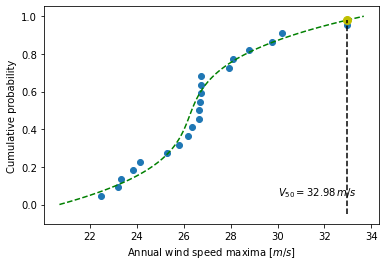

In [17]:
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
print(years_nb)

cprob = (np.arange(years_nb, dtype=np.float32) + 1)/(years_nb + 1)
print(cprob)
sorted_max_speeds = np.sort(max_speeds)

from scipy.interpolate import UnivariateSpline

quantile_func = UnivariateSpline(cprob, sorted_max_speeds)

nprob = np.linspace(0, 1, 100)
fitted_max_speeds = quantile_func(nprob)

fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)
fifty_wind  


plt.figure()
plt.plot(sorted_max_speeds, cprob, 'o')
plt.plot(fitted_max_speeds, nprob, 'g--')
plt.plot([fifty_wind], [fifty_prob], 'o', ms=8., mfc='y', mec='y')
plt.text(30, 0.05, '$V_{50} = %.2f \, m/s$' % fifty_wind)
plt.plot([fifty_wind, fifty_wind], [plt.axis()[2], fifty_prob], 'k--')
plt.xlabel('Annual wind speed maxima [$m/s$]')
plt.ylabel('Cumulative probability')

9.2\. **Curve fitting of temperature in Alaska** (20 MINUTES)

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[ 6.73581623  5.26443311 15.77932266 23.09208465] 
 [  7.16452592   3.90418156 -61.32093702  52.64929226]


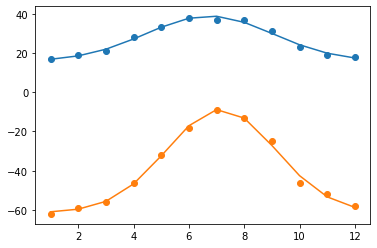

In [19]:
import scipy
from scipy import optimize

tmax = [ 17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18 ]
tmin = [ -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58 ]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
           'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

t = np.linspace(1,12,12)
plt.scatter(t,tmax)
plt.scatter(t,tmin)


def f(x,mu,std,b,z):
    return z*np.exp(-(x-mu)**2/(2*std))+b

parmax, covmax = scipy.optimize.curve_fit(f, t, tmax, p0=[7,3,18,10])
parmin, covmin = scipy.optimize.curve_fit(f, t, tmin, p0=[7,3,-60,10])

print(parmax,'\n',parmin)

plt.plot(t,f(t,*parmax))
plt.plot(t,f(t,*parmin))
plt.show()

9.3\. **2D minimization of a six-hump camelback function** (20 MINUTES)

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


      fun: -1.031628453489792
 hess_inv: array([[ 0.12834733, -0.00788046],
       [-0.00788046,  0.06138301]])
      jac: array([-2.08616257e-07, -1.54972076e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([-0.08984202,  0.7126563 ])


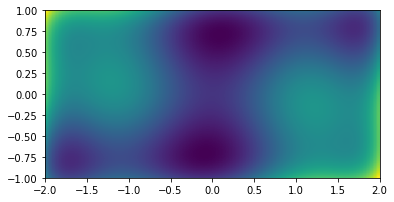

In [20]:
import numpy
import pylab

from scipy import optimize

def shcf(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2

N=100
x=np.linspace(-2,2,N)
y=np.linspace(-1,1,N)
grid = numpy.meshgrid(x,y)
#print(shcf(grid))

extent = np.min(grid[0]), np.max(grid[0]), np.min(grid[1]), np.max(grid[1])
pylab.imshow(shcf(grid), extent=extent)

initial_guess = np.array((0,1))
results = optimize.minimize(shcf, initial_guess)
print(results)

9.5\. **FFT of an image** (30 MINUTES)

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

Text(0.5, 1.0, 'Filtered picture')

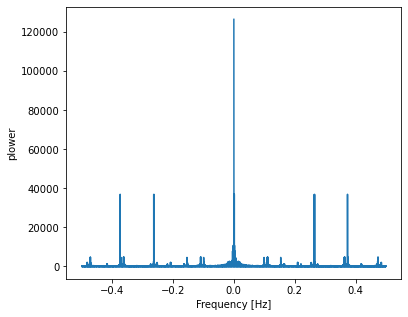

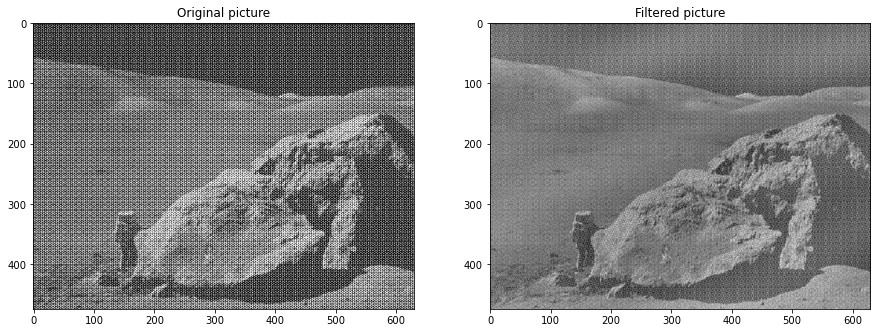

In [29]:
from scipy import fftpack

img = plt.imread('moonlanding.png')

img_fft = fftpack.fft2(img)
power = np.abs(img_fft)

sample_freq = fftpack.fftfreq(img.size)
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power.reshape(-1,1))
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')


img_fft[power > 3000] = 0
img_flt = fftpack.ifft2(img_fft).real

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_flt, cmap='gray')
ax[0].set_title('Original picture')
ax[1].set_title('Filtered picture')

10.1\. **Radioactive decay chain** (30 MINUTES)

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

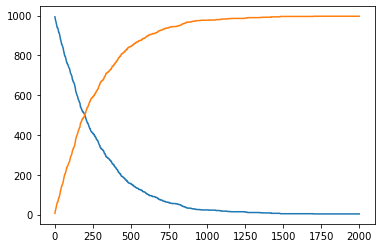

In [34]:
th = 1000
ld = 0
tau = 3.052*60
T = []
L = []

def pt(t,tau):
    return 1-2**(-t/tau)

tmax = 2000
for i in range(tmax):
    rand = np.random.random(th)
    k = len(rand[rand<pt(1,tau)])
    th += -k
    ld += k
    T.append(th)
    L.append(ld)

t = np.arange(tmax)
plt.plot(t, T)
plt.plot(t, L)

[ 262.55134032 1394.5439986   233.27362725 ...   10.82387869   21.27732219
   20.34377284]


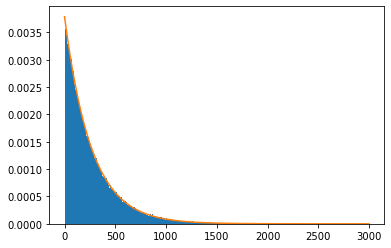

In [56]:
def pti(t,tau):
    return 2**(-t/tau)*np.log(2)/tau
def pdfi(z,tau):
    return -tau*np.log2(1-z)

N=100000
r = np.random.uniform(0,1,N)

histo = pdfi(r,tau)
print(histo)

fig, ax = plt.subplots()
ax.hist(histo, bins=int(np.sqrt(N)), density=True )

x=np.arange(3000)
ax.plot(x, pti(x,tau))



10.2\. **Rutherford Scattering** (30 MINUTES)

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [82]:
Z = 79
E = 7.7*10**6*const.e
import scipy.constants as const

bmax = Z*const.e**2/(np.pi*2*const.epsilon_0*E)

std = const.physical_constants['Bohr radius'][0]/100

N=10**6
x = np.random.normal(0,std,N)
y = np.random.normal(0,std,N)
beam = np.random.normal(0, bmax, size=(N,2))

b = np.sqrt( x**2+y**2 )

#plt.scatter(x,y)
#plt.scatter(beam[:,0],beam[:,1])

frac = len(b[b<bmax])/N
print(frac*100)

0.158


10.3\. **Monte Carlo integration: hit/miss vs mean value method** (30 MINUTES)

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [87]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

#hit/miss
area = 2
N = 1000000
x = np.random.uniform(0,2,N)
y = np.random.uniform(0,1,N)
func = f(x)
I = len(y[y<func])*area/N
print(I)

#mean value
I = area/N * np.sum(func)
print(I)

1.451184
1.4507998735643095


10.4\. **Monte Carlo integration in high dimension** (30 MINUTES)

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



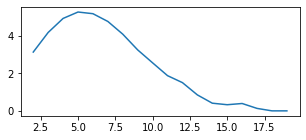

In [98]:
def vol(d,N):
    s = 0
    for i in range(d):
        s += np.random.uniform(-1,1,N)**2
    v = len(s[s<1])/N*2**d
    return v

N=1000000
vols=[]
t=np.arange(2,20)
for d in range(2,20):
    vols.append(vol(d,N))

fig, ax = plt.subplots(figsize = (5,2))
ax.plot(t,vols)

10.5\. **Monte Carlo integration with importance sampling**  (30 MINUTES)

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

0.8435877725922962


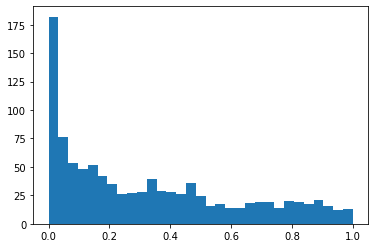

In [129]:
import scipy.stats as st

N = 1000
x = np.linspace(0,1, N)

y = st.powerlaw.rvs(0.5, size=N)# no multiplication since this would just change the range in which numbers are generated
y.sort()
plt.hist(y, bins=int(np.sqrt(N)))

f = 1.0 / (np.exp(y) + 1)

I = 2 * 1.0/N * np.sum(f)

print(I)

